P2 Project Submission
By Garrett Busch 
Jan 2017

Intro 

Baseball America's golden pasttime. This one sport has truly been a source of entertainment for the USA for generations. Beyond the awe-inspiring athletic feats of athletes like Bonds, Chapman, Jackson lies an advanced sabermetric world full of mathmatical measures to apply. In terms of American sports, Baseball, has always owned virtue to numbers and/or metrics. Ask any baseball fan what "three-hundred" is and they will likely respond with the measure at which a hitter is able to attain a hit in any given at-bat (and to be considered very good at it). With the advent of new technologies such as statcast we are able to analyze this game like its never been done before.

Yet, there is still so much to garner from the information of Baseball's past. One such question, that for me, has always been truly hard to magnify but becomes evident as players ascend the little league ranks to the bigs is 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

GHreposit = "https://raw.githubusercontent.com/thrabchak/Udacity-Data-Analysis/"
subfoler = "master/P2%20Baseball%20Managers/data/"

In [2]:
# Shift-Tab to see paramters/help for function
fileMaster = pd.read_csv('Master.csv')
fileBatting = pd.read_csv('Batting.csv')
filePitching = pd.read_csv('Pitching.csv')
fileFielding = pd.read_csv('Fielding.csv')
fileAppearance = pd.read_csv('Appearances.csv')
fileSalaries = pd.read_csv('Salaries.csv')
fileHOF = pd.read_csv('HallOfFame.csv')
fileAllStart = pd.read_csv('AllstarFull.csv')
fileManagers = pd.read_csv('Managers.csv')
fileAwards = pd.read_csv('AwardsPlayers.csv')

In [3]:
fileMaster.head(5)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,205.0,75.0,R,R,4/6/2004,9/28/2013,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,4/13/1954,10/3/1976,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,4/10/1962,9/26/1971,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,7/26/1977,10/3/1990,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,9/10/2001,4/13/2006,abada001,abadan01


In [4]:
fileBatting.head(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [5]:
filePitching.head(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [6]:
fileFielding.head(5)

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,NaN,NaN,1.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,NaN,NaN,67.0,72.0,42.0,5.0,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,NaN,NaN,8.0,14.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,NaN,NaN,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,NaN,NaN,51.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN


In [7]:
fileAppearance.head(5)

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,BS1,NaN,barnero01,31.0,NaN,31,31.0,0,0,...,16,0,15,0,0,0,0,NaN,NaN,NaN
1,1871,BS1,NaN,barrofr01,18.0,NaN,18,18.0,0,0,...,1,0,0,13,0,4,17,NaN,NaN,NaN
2,1871,BS1,NaN,birdsda01,29.0,NaN,29,29.0,0,7,...,0,0,0,0,0,27,27,NaN,NaN,NaN
3,1871,BS1,NaN,conefr01,19.0,NaN,19,19.0,0,0,...,0,0,0,18,0,1,18,NaN,NaN,NaN
4,1871,BS1,NaN,gouldch01,31.0,NaN,31,31.0,0,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN


In [8]:
fileSalaries.head(5)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [9]:
fileHOF.head(5)

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [10]:
fileAllStart.head(5)

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1,5.0


In [11]:
fileManagers.head(5)

,playerID,yearID,teamID,lgID,inseason,G,W,L,rank,plyrMgr
0,wrighha01,1871,BS1,NaN,1,31,20,10,3.0,Y
1,woodji01,1871,CH1,NaN,1,28,19,9,2.0,Y
2,paborch01,1871,CL1,NaN,1,29,10,19,8.0,Y
3,lennobi01,1871,FW1,NaN,1,14,5,9,8.0,Y
4,deaneha01,1871,FW1,NaN,2,5,2,3,8.0,Y


In [12]:
fileAwards.head(5)

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


There are many things to discover about this data. Having played baseball and having general awareness to many baseball statistics there a certain "random" which may be of fun fact. For instance, it may be interesting to know who was the best "team-mate" of all time, or maybe how players "peak" years have evolved over time.

Some highlited details that Udacity would like me to look at are the relationship between different metrics, analyzing independent (3) and dependent (1) variables, and the characteristics of players with the highest salaries.

Lets begin..

## A few supporting metrics:

Number of people who have played MLB (from dataset).. 18,589

In [13]:
totplayers = fileMaster.shape[0]

How many different countries have been represented in the MLB?.. 52

In [14]:
fileMaster.groupby(['birthCountry']).size()

birthCountry
Afghanistan           1
American Samoa        1
Aruba                 5
At Sea                1
Australia            28
Austria               4
Bahamas               6
Belgium               1
Belize                1
Brazil                2
CAN                 244
China                 1
Colombia             14
Cuba                191
Curacao              14
Czech Republic        4
D.R.                619
Denmark               1
Finland               1
France                8
Germany              45
Greece                1
Guam                  1
Honduras              1
Indonesia             1
Ireland              50
Italy                 7
Jamaica               4
Japan                61
Lithuania             1
Mexico              114
Netherlands          12
Nicaragua            13
Norway                3
P.R.                246
Panama               53
Philippines           1
Poland                5
Russia                8
Saudi Arabia          2
Singapore             1
Slo

So..

In [15]:
len(fileMaster.groupby(['birthCountry']).size())

52

It seems there maybe some holes in our dataset i.e. players without a birth country..

In [16]:
fileMaster.fillna

<bound method DataFrame.fillna of         playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0      aardsda01     1981.0        12.0      27.0          USA         CO   
1      aaronha01     1934.0         2.0       5.0          USA         AL   
2      aaronto01     1939.0         8.0       5.0          USA         AL   
3       aasedo01     1954.0         9.0       8.0          USA         CA   
4       abadan01     1972.0         8.0      25.0          USA         FL   
5       abadfe01     1985.0        12.0      17.0         D.R.  La Romana   
6      abadijo01     1854.0        11.0       4.0          USA         PA   
7      abbated01     1877.0         4.0      15.0          USA         PA   
8      abbeybe01     1869.0        11.0      11.0          USA         VT   
9      abbeych01     1866.0        10.0      14.0          USA         NE   
10     abbotda01     1862.0         3.0      16.0          USA         OH   
11     abbotfr01     1874.0        10.0   

In [17]:
fileMaster.groupby(['birthCountry']).size()

birthCountry
Afghanistan           1
American Samoa        1
Aruba                 5
At Sea                1
Australia            28
Austria               4
Bahamas               6
Belgium               1
Belize                1
Brazil                2
CAN                 244
China                 1
Colombia             14
Cuba                191
Curacao              14
Czech Republic        4
D.R.                619
Denmark               1
Finland               1
France                8
Germany              45
Greece                1
Guam                  1
Honduras              1
Indonesia             1
Ireland              50
Italy                 7
Jamaica               4
Japan                61
Lithuania             1
Mexico              114
Netherlands          12
Nicaragua            13
Norway                3
P.R.                246
Panama               53
Philippines           1
Poland                5
Russia                8
Saudi Arabia          2
Singapore             1
Slo

Of the USA players how many states have been represented?.. 51 (All + DC included)

In [18]:
fileMaster[(fileMaster['birthCountry'] == 'USA')].groupby(['birthState']).size()

birthState
AK      11
AL     321
AR     152
AZ      99
CA    2115
CO      88
CT     204
DC     101
DE      54
FL     469
GA     338
HI      39
IA     217
ID      28
IL    1051
IN     368
KS     210
KY     278
LA     245
MA     660
MD     310
ME      78
MI     430
MN     163
MO     601
MS     198
MT      24
NC     394
ND      16
NE     112
NH      53
NJ     426
NM      28
NV      35
NY    1202
OH    1030
OK     254
OR     125
PA    1414
RI      77
SC     175
SD      37
TN     293
TX     873
UT      38
VA     283
VT      38
WA     189
WI     244
WV     120
WY      14
dtype: int64

In [19]:
len(fileMaster[(fileMaster['birthCountry'] == 'USA')].groupby(['birthState']).size())

51

What % of players have become deceased?.. ~50%

In [20]:
fileMaster.groupby(['deathYear']).size().sum() / totplayers

0.4962612297595352

Heaviest/Lightest/Tallest/Shortest reported player ever?

In [21]:
fileMaster.loc[fileMaster['weight'].argmax(),'nameGiven'] + " " + fileMaster.loc[fileMaster['weight'].argmax(),'nameLast'] + " @ " + str(fileMaster['weight'].max())

'Walter Ernest Young @ 320.0'

In [22]:
fileMaster.loc[fileMaster['weight'].argmin(),'nameGiven'] + " " + fileMaster.loc[fileMaster['weight'].argmin(),'nameLast'] + " @ " + str(fileMaster['weight'].min())

'Edward Carl Gaedel @ 65.0'

In [23]:
fileMaster.loc[fileMaster['height'].argmax(),'nameGiven'] + " " + fileMaster.loc[fileMaster['height'].argmax(),'nameLast'] + " @ " + str(fileMaster['height'].max())

'Jon Erich Rauch @ 83.0'

In [24]:
fileMaster.loc[fileMaster['height'].argmin(),'nameGiven'] + " " + fileMaster.loc[fileMaster['height'].argmin(),'nameLast'] + " @ " + str(fileMaster['height'].min())

'Edward Carl Gaedel @ 43.0'

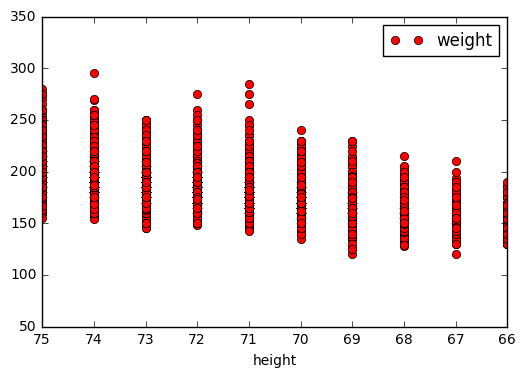

In [26]:
fileMaster.plot(x='height', y='weight', style='ro')

Now lets get to some of these baseball stats. 

Max HRs per year

In [29]:
fileBatting.groupby('yearID')['HR'].max()

yearID
1871     4.0
1872     6.0
1873     4.0
1874     5.0
1875     6.0
1876     5.0
1877     4.0
1878     4.0
1879     9.0
1880     6.0
1881     8.0
1882     7.0
1883    14.0
1884    27.0
1885    13.0
1886    11.0
1887    19.0
1888    16.0
1889    20.0
1890    14.0
1891    16.0
1892    13.0
1893    19.0
1894    18.0
1895    18.0
1896    13.0
1897    11.0
1898    15.0
1899    25.0
1900    12.0
        ... 
1985    40.0
1986    40.0
1987    49.0
1988    42.0
1989    47.0
1990    51.0
1991    44.0
1992    43.0
1993    46.0
1994    43.0
1995    50.0
1996    52.0
1997    56.0
1998    70.0
1999    65.0
2000    50.0
2001    73.0
2002    57.0
2003    47.0
2004    48.0
2005    51.0
2006    58.0
2007    54.0
2008    48.0
2009    47.0
2010    54.0
2011    43.0
2012    44.0
2013    53.0
2014    40.0
Name: HR, dtype: float64

Interesting, and how about something arbitrary, ABs?

In [32]:
fileBatting.groupby('yearID')['AB'].max()

yearID
1871    168.0
1872    297.0
1873    325.0
1874    362.0
1875    408.0
1876    335.0
1877    290.0
1878    285.0
1879    409.0
1880    382.0
1881    375.0
1882    397.0
1883    448.0
1884    521.0
1885    492.0
1886    597.0
1887    627.0
1888    585.0
1889    604.0
1890    596.0
1891    603.0
1892    660.0
1893    600.0
1894    613.0
1895    565.0
1896    586.0
1897    566.0
1898    654.0
1899    633.0
1900    586.0
        ...  
1985    691.0
1986    687.0
1987    655.0
1988    657.0
1989    651.0
1990    642.0
1991    665.0
1992    659.0
1993    641.0
1994    484.0
1995    607.0
1996    682.0
1997    684.0
1998    686.0
1999    690.0
2000    676.0
2001    692.0
2002    696.0
2003    682.0
2004    704.0
2005    696.0
2006    699.0
2007    716.0
2008    688.0
2009    682.0
2010    680.0
2011    677.0
2012    683.0
2013    667.0
2014    684.0
Name: AB, dtype: float64

Lets flip to the defensive side of the ball.

By year, by position, average

In [38]:
fileFielding.groupby('yearID').groups

{1871: Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             217, 218, 219, 220, 221, 222, 223, 224, 225, 226],
            dtype='int64', length=227),
 1872: Int64Index([227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
             ...
             502, 503, 504, 505, 506, 507, 508, 509, 510, 511],
            dtype='int64', length=285),
 1873: Int64Index([512, 513, 514, 515, 516, 517, 518, 519, 520, 521,
             ...
             766, 767, 768, 769, 770, 771, 772, 773, 774, 775],
            dtype='int64', length=264),
 1874: Int64Index([ 776,  777,  778,  779,  780,  781,  782,  783,  784,  785,
             ...
             1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035],
            dtype='int64', length=260),
 1875: Int64Index([1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045,
             ...
             1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502],
            dtype='int64', length=467),
 1876: Int